<a href="https://colab.research.google.com/github/bellemosca/projeto_final-bootcamp_womakers/blob/main/DESAFIO_FINAL_SQUAD_Grace_Hopper_Reclamacao_Consumidor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **<font color=#1B2EB7>Bootcamp Data Analytics | DAT7</font>**

#### **<font color=#FF4500>Challenge:**</font> Desafio Final: Reclamações do Consumidor

##### **<font color=#FF1493>Líder: Maria Isabelle Mosca de Araújo</font>**

<font color=#1B2EB7>

1. Andreia de Souza Melo Paschoarelli
2. Amanda Cruz de Araújo
3. Alexsandra Tavares S. da Silva
4. Hosana Fernandes Gomes
5. Isabela de Souza Silva
6. Luana Verçosa
7. Michele Farias das Virgens
<font color=#1B2EB7>


---



In [ ]:
# Imports utilizados para a resolução do desafio
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.cm as cm
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Conectando os dataframes atraves do Drive
drive.mount('/content/drive/',  force_remount=True)
path = '/content/drive/My Drive/DESAFIO FINAL/data/'
arquivo_principal = path + 'reclamacoes-fundamentadas-sindec-2017_a_2021_COMPACTADO_HIGIENIZADO_COM_CNPJ_ZEROS.csv'
arquivo_regioes = path + 'RegioesBR.csv'
arquivo_estados = path + 'EstadosBR.csv'


try:
  df = pd.read_csv(arquivo_principal, delimiter=';', encoding='utf-8', on_bad_lines='skip')
  df_regioes = pd.read_csv(arquivo_regioes, delimiter=';', encoding='utf-8', on_bad_lines='skip')
  df_estados = pd.read_csv(arquivo_estados, delimiter=';', encoding='utf-8', on_bad_lines='skip')
  print(f"Sucesso ao ler os arquivos !")
except Exception as e:
  print(f"Erro ao ler os arquivos: {e}")

Mounted at /content/drive/
Sucesso ao ler os arquivos !


# **Fazendo a análise exploratória dos dados(EDA):**


##**Tratamento dos dados de origem:**

Foi consolidado em um unico arquivo todos os dados dos anos e eliminado campos desnecessários.

**Estrutura do arquivo gerado:**

*  **AnoCalendario**     - Ano da abertura da reclamação
*  **MesCalendario**     - Mês da abertura da reclamação
*  **TotalDias**         - Total de dias até a resolução do problema
*  **CodigoRegiao**      - Código da região
*  **Regiao**            - Descrição da região
*  **UF**				  - Estado
*  **NumeroCNPJ**        - Numero do CNPJ da empresa reclamada
*  **strRazaoSocial**    - Razão social da empresa reclamada
*  **CNAEPrincipal**     - Código da atividade principal da empresa reclamada
*  **DescCNAEPrincipal** - Descrição da atividade principal da empresa reclamada
*  **Atendida**          - Indica se a reclamação foi atendida ou não (S/N)
*  **CodigoAssunto**     - Código do assunto
*  **DescricaoAssunto**  - Descrição do assunto
*  **CodigoProblema**    - Código do problema
*  **DescricaoProblema** - Descrição do problema
*  **SexoConsumidor**    - sexo do consumidor reclamante
*  **FaixaEtariaConsumidor** - Faixa etária do consumidor reclamante



Criado os campos através da formula no Google Sheets:

**TotalDias** = ((EXT.TEXTO(B2;9;2)&"/"&EXT.TEXTO(B2;6;2)&"/"&ESQUERDA(B2;4)) -(EXT.TEXTO(C2;9;2)&"/"&EXT.TEXTO(C2;6;2)&"/"&ESQUERDA(C2;4)))

**MesCalendario** (baseado na data de abertura):  
=EXT.TEXTO(C2;6;2)



**Datasets Criados**:

1) **Populações das regiões**

CodigoRegiao	Regiao	       Populacao_Estimada

*   3				**Sudeste**			  87.600.000
*   2				**Nordeste**		  58.600.000
*   4				**Sul**			      30.600.000
*   5				**Centro-Oeste**	17.500.000
*   1				**Norte**			    18.500.000




2) **Populações dos Estados**:

Estado	Nome	Populacao_Estimada
* **SP**	São Paulo	46.300.000
* **MG**	Minas Gerais	21.600.000
* **RJ**	Rio de Janeiro	17.500.000
* **BA**	Bahia	17.500.000
* ...


**Considerações sobre os dados:**

**1) Adoção para referencia das das empresas:**


* **3** registros não tem o nome da empresa (Razão social)

* **20.121** -  registros não tem o nome fantasia da empresa

* **15.609** registros não tem o nome da empresa da receita Federal (RazaoSocialRFB)

* **19.604** registros não tem o nome fantasia da empresa da receira federal (NomeFantasiaRFB)


Dados esses números vamos manter apenas o campo Razão social: **strRazaoSocial**


**2) Datas e Determinação no numero de dias de solução**

* **25** registros que nao tem data abertura ou  encerramento


**3) Nomes das empresas diferentes**

Exemplo:

*   BANCO SANTANDER (BRASIL) S.A. @
*   BANCO SANTANDER S/A - ABN AMRO BANK - BANCO REAL
*   BANCO ABN AMRO REAL S.A. - GRUPO SANTANDER
*   SANTANDER BRASIL ADMINISTRADORA DE CONSORCIO LTDA
*   SANTANDER LEASING S/A ARRENDAMENTO MERCANTIL
*   BANCO SANTANDER (BRASIL) S.A.
*   BANCO SANTANDER (BRASIL) S/A
*   BANCO SANTANDER S/A
*   SANTANDER

**Arquivos disponibilizados**:

  1) reclamacoes-fundamentadas-sindec-2017_a_2021_COMPACTADO_HIGIENIZADO.csv

  2) EstadosBR.csv

  3) RegioesBR.csv



In [ ]:
df.head()

,AnoCalendario,MesCalendario,TotalDias,CodigoRegiao,Regiao,UF,NumeroCNPJ,strRazaoSocial,CNAEPrincipal,DescCNAEPrincipal,Atendida,CodigoAssunto,DescricaoAssunto,CodigoProblema,DescricaoProblema,SexoConsumidor,FaixaEtariaConsumidor
0,2017,10.0,70.0,3,Sudeste,SP,"6,07012E+13",ITAÚ UNIBANCO S/A,6422100,"BANCOS MÚLTIPLOS, COM CARTEIRA COMERCIAL",S,76,Outros Contratos,1112.0,"Contrato (não cumprimento, alteração, transfer...",F,entre 31 a 40 anos
1,2017,12.0,134.0,3,Sudeste,SP,"4,04325E+13",CLARO S/A,0,Sem classificação de CNAE,S,186,Telefonia Fixa ( Plano de Expansão / Compra e ...,3844.0,Contrato - Rescisão/alteração unilateral,M,mais de 70 anos
2,2017,12.0,130.0,3,Sudeste,SP,"6,16952E+13",ELETROPAULO METROPOLITANA ELETRICIDADE DE S PAULO,3514000,DISTRIBUIÇÃO DE ENERGIA ELÉTRICA,N,185,Energia Elétrica,6030.0,PID - Pedido de Indenização por Danos Morais,F,entre 31 a 40 anos
3,2017,10.0,99.0,3,Sudeste,SP,"7,15574E+12",GNN GARAGENS LTDA - EPP,5223100,ESTACIONAMENTO DE VEÍCULOS,N,262,"Estacionamento ( Particular, Supermercado, Sho...",4946.0,"Vicio de qualidade (mal executado, inadequado,...",M,entre 31 a 40 anos
4,2017,12.0,136.0,3,Sudeste,SP,"4,04325E+13",CLARO S/A,6120501,TELEFONIA MÓVEL CELULAR,S,186,Telefonia Fixa ( Plano de Expansão / Compra e ...,3624.0,"Vicio de qualidade (mal executado, inadequado,...",M,entre 41 a 50 anos


In [ ]:
df.describe()

,AnoCalendario,MesCalendario,TotalDias,CodigoRegiao,CNAEPrincipal,CodigoAssunto,CodigoProblema
count,115967.000000,115942.000000,115942.000000,115967.000000,1.159670e+05,1.159670e+05,50511.000000
mean,2018.158002,7.346794,206.897699,3.347996,4.878204e+06,1.921834e+02,3097.749718
std,1.211176,3.484659,349.363673,1.194249,2.408869e+06,1.897552e+04,1849.755595
min,2017.000000,1.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,2017.000000,4.000000,50.000000,3.000000,3.600601e+06,7.600000e+01,1657.000000
50%,2018.000000,8.000000,91.000000,3.000000,5.310501e+06,1.060000e+02,2582.000000
75%,2019.000000,10.000000,173.000000,5.000000,6.422100e+06,1.860000e+02,3778.000000
max,2021.000000,12.000000,4448.000000,5.000000,9.700500e+06,6.462000e+06,7737.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115967 entries, 0 to 115966
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   AnoCalendario          115967 non-null  int64  
 1   MesCalendario          115942 non-null  float64
 2   TotalDias              115942 non-null  float64
 3   CodigoRegiao           115967 non-null  int64  
 4   Regiao                 115967 non-null  object 
 5   UF                     115967 non-null  object 
 6   NumeroCNPJ             115967 non-null  object 
 7   strRazaoSocial         115964 non-null  object 
 8   CNAEPrincipal          115967 non-null  int64  
 9   DescCNAEPrincipal      115403 non-null  object 
 10  Atendida               115967 non-null  object 
 11  CodigoAssunto          115967 non-null  int64  
 12  DescricaoAssunto       115966 non-null  object 
 13  CodigoProblema         50511 non-null   float64
 14  DescricaoProblema      50527 non-nul

In [ ]:
df.columns

Index(['AnoCalendario', 'MesCalendario', 'TotalDias', 'CodigoRegiao', 'Regiao',
       'UF', 'NumeroCNPJ', 'strRazaoSocial', 'CNAEPrincipal',
       'DescCNAEPrincipal', 'Atendida', 'CodigoAssunto', 'DescricaoAssunto',
       'CodigoProblema', 'DescricaoProblema', 'SexoConsumidor',
       'FaixaEtariaConsumidor'],
      dtype='object')

In [ ]:
df_regioes.head()
df_regioes.info()
print(df_regioes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CodigoRegiao        5 non-null      int64 
 1   Regiao              5 non-null      object
 2   Populacao_Estimada  5 non-null      object
 3   Observacoes         4 non-null      object
dtypes: int64(1), object(3)
memory usage: 288.0+ bytes
   CodigoRegiao        Regiao Populacao_Estimada  \
0             3       Sudeste         87.600.000   
1             2      Nordeste         58.600.000   
2             4           Sul         30.600.000   
3             5  Centro-oeste         17.500.000   
4             1         Norte         18.500.000   

                                         Observacoes  
0  Composta pelos estados: São Paulo,Minas Gerais...  
1  Bahia,Pernambuco,Ceará,Maranhão,Paraíba,Alagoa...  
2                                                NaN  
3  Goiás,Mato Grosso,Mat

In [ ]:
df_estados.head()
df_estados.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Estado              26 non-null     object
 1   Nome                26 non-null     object
 2   Populacao_Estimada  26 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 752.0+ bytes




---



##**1 -** Existe alguma sazonalidade na data de abertura de uma reclamação? Ou seja, mais consumidores abrem reclamações em determinada época do ano?


In [ ]:
df['MesCalendario'] = df['MesCalendario'].fillna("Não Classificados")

# Criar uma nova coluna 'MesCalendarioNumerico' com os valores numéricos
df['MesCalendarioNumerico'] = pd.to_numeric(df['MesCalendario'], errors='coerce')

# Manter "Não Classificados" na coluna original e converter apenas os valores numéricos na nova coluna
df['MesCalendarioNumerico'] = df['MesCalendarioNumerico'].fillna("Não Classificados")

df_numerico = df[df['MesCalendarioNumerico'] != "Não Classificados"].copy()
df_numerico['MesCalendarioNumerico'] = df_numerico['MesCalendarioNumerico'].astype(int)

# Criar a coluna de data no formato ano-mes-dia
df_numerico['DataAbertura'] = pd.to_datetime(
    df_numerico['AnoCalendario'].astype(str) + '-' + df_numerico['MesCalendarioNumerico'].astype(str) + '-01',
    format='%Y-%m-%d'
)

# Contar reclamações por mês
reclamacoes_por_mes = df_numerico.groupby('DataAbertura').size().reset_index(name='Quantidade')

In [ ]:
# Gráfico interativo utilizando a biblioteca plotly
fig = px.line(
    reclamacoes_por_mes,
    x='DataAbertura',
    y='Quantidade',
    title='Evolução das Reclamações ao longo dos Anos',
    labels={'DataAbertura': 'Data', 'Quantidade': 'Quantidade de Reclamações'},
    markers=True
)

fig.update_traces(
    hovertemplate="<b>Data: %{x|%Y-%m}</b><br>Quantidade: %{y}<extra></extra>"
)

fig.update_layout(
    xaxis_title="Anos",
    yaxis_title="Quantidade de Reclamações",
    hovermode="x"
)
fig.show()

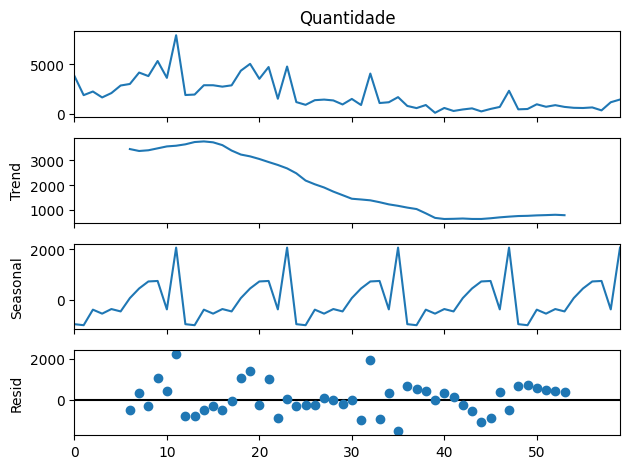

In [ ]:
# Mostrando a tencência, sazonalidade e residual
from statsmodels.tsa.seasonal import seasonal_decompose
decomposicao = seasonal_decompose(reclamacoes_por_mes['Quantidade'], model='additive', period=12)
decomposicao.plot()
plt.show()

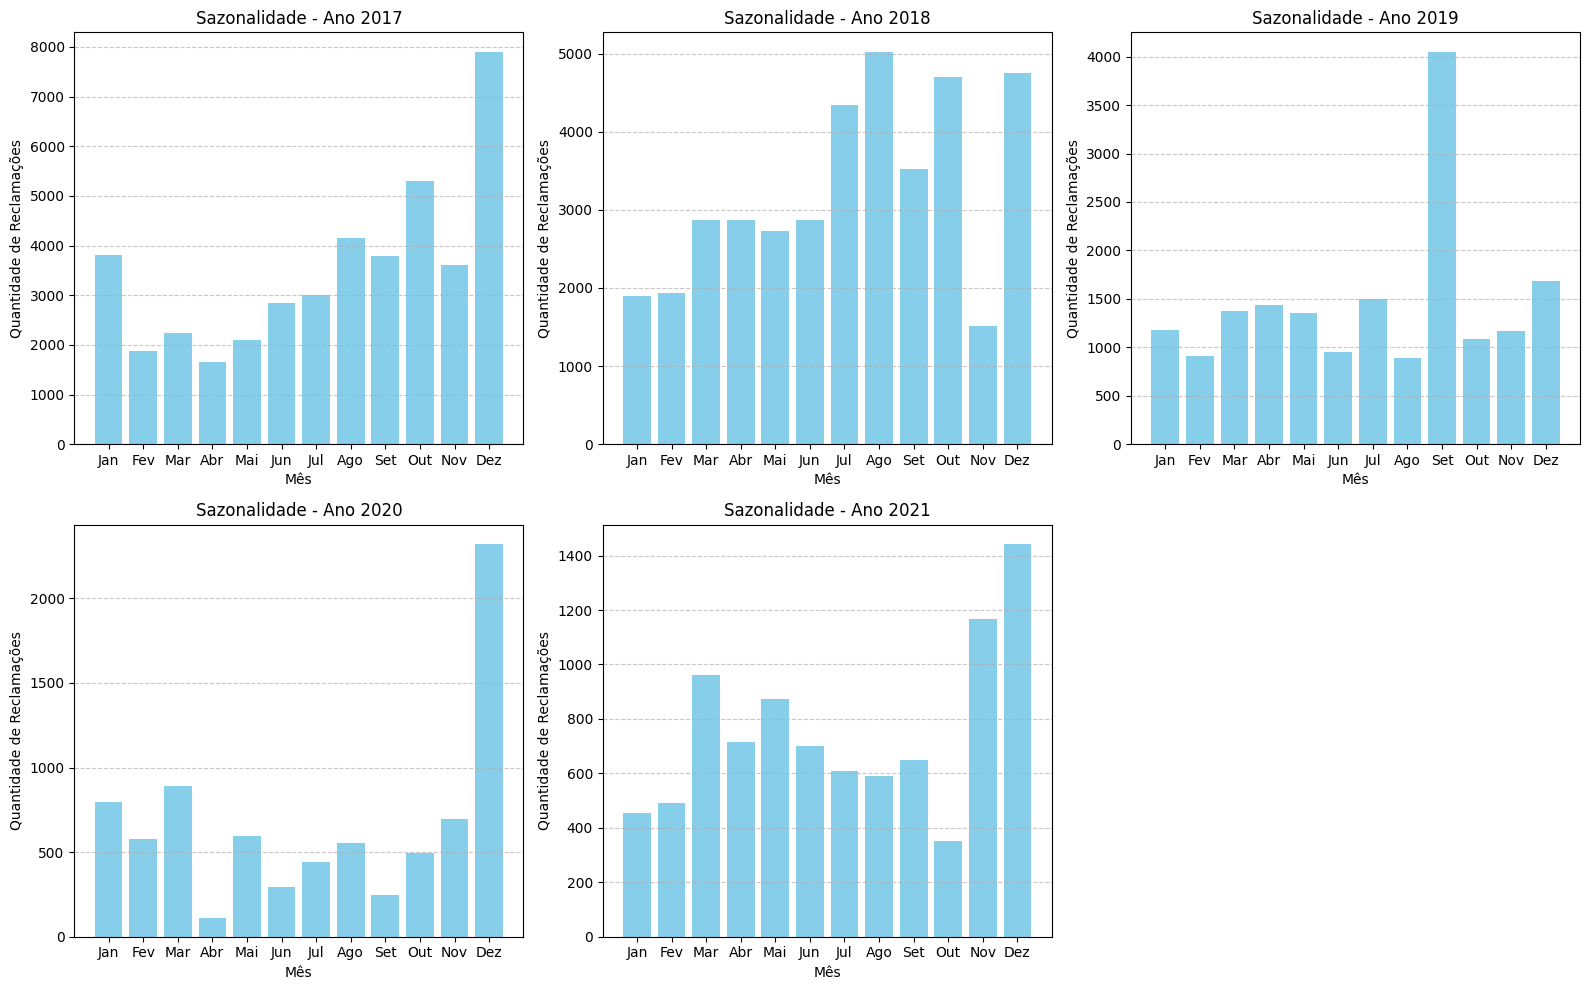

In [ ]:
# Aqui fiz a sazonalidade separado de acordo com o ano
# Filtrar apenas linhas onde 'MesCalendarioNumerico' é numérico
df_numerico = df[df['MesCalendarioNumerico'] != "Não Classificados"].copy()

# Certifique-se de que 'MesCalendarioNumerico' seja inteiro
df_numerico['MesCalendarioNumerico'] = df_numerico['MesCalendarioNumerico'].astype(int)

# Agrupar os dados por Ano e Mês e somar o total de reclamações
reclamacoes_ano_mes = (
    df_numerico.groupby(['AnoCalendario', 'MesCalendarioNumerico'])
    .size()
    .reset_index(name='Quantidade')
)

# Criar gráficos separados por ano
anos = reclamacoes_ano_mes['AnoCalendario'].unique()
plt.figure(figsize=(16, 10))

for i, ano in enumerate(anos, 1):
    dados_ano = reclamacoes_ano_mes[reclamacoes_ano_mes['AnoCalendario'] == ano]

    plt.subplot(2, 3, i)
    plt.bar(dados_ano['MesCalendarioNumerico'], dados_ano['Quantidade'], color='skyblue')
    plt.title(f'Sazonalidade - Ano {ano}')
    plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
    plt.xlabel('Mês')
    plt.ylabel('Quantidade de Reclamações')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()  # Ajustar layout para evitar sobreposição
plt.show()

##**2 -** Qual o tempo médio de uma reclamação ativa (da abertura até a data de fechamento)?


In [ ]:
df['TotalDias'] = pd.to_numeric(df['TotalDias'], errors='coerce')
df_validas = df[df['TotalDias'] > 0]
tempo_medio = df_validas['TotalDias'].mean()

print(f"O tempo médio de uma reclamação ativa é de {tempo_medio:.1f} dias.")

O tempo médio de uma reclamação ativa é de 207.0 dias.


##**3 -** O número de reclamações varia de acordo com a região? e de acordo com o estado? E se ponderarmos pela população média do estado?


         Regiao  TotalReclamacoes
3       Sudeste             55947
0  Centro-oeste             32057
1      Nordeste             14237
2         Norte              7749
4           Sul              5977


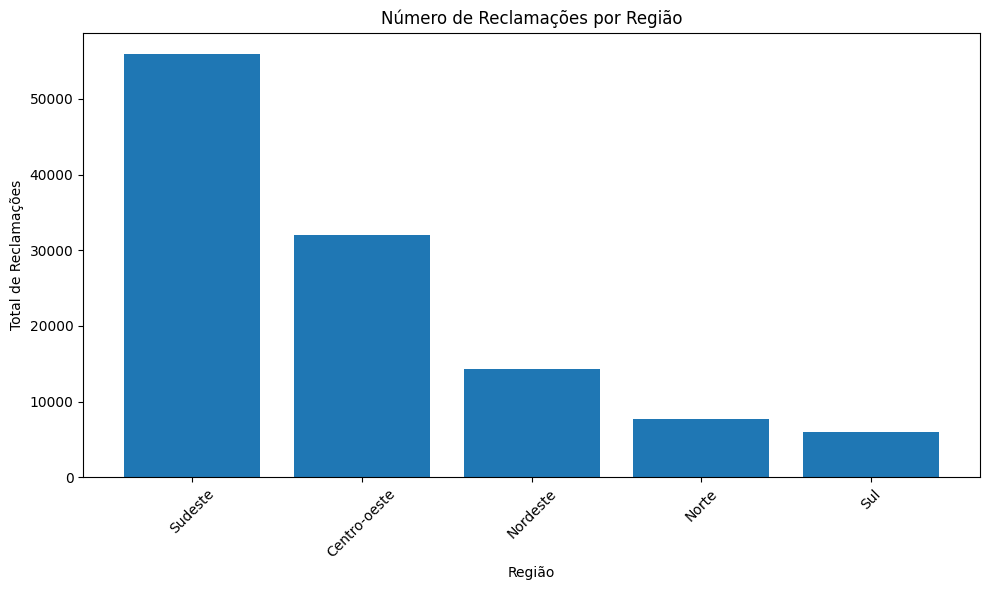

In [ ]:
#Agrupando pela coluna Regiao
reclamacoes_por_regiao = df.groupby('Regiao').size().reset_index(name='TotalReclamacoes')

# Ordenar os dados para melhor visualização
reclamacoes_por_regiao = reclamacoes_por_regiao.sort_values(by='TotalReclamacoes', ascending=False)


print(reclamacoes_por_regiao)


plt.figure(figsize=(10, 6))
plt.bar(reclamacoes_por_regiao['Regiao'], reclamacoes_por_regiao['TotalReclamacoes'])
plt.title('Número de Reclamações por Região')
plt.xlabel('Região')
plt.ylabel('Total de Reclamações')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

    UF  TotalReclamacoes Estado                 Nome  Populacao_Estimada
0   BA                25     BA                Bahia            17500000
1   CE              1982     CE                Ceará             9200000
2   ES              2781     ES       Espírito Santo             4100000
3   GO             17263     GO                Goiás             7300000
4   MA               216     MA             Maranhão             7200000
5   MG              8551     MG         Minas Gerais            21600000
6   MT              7822     MT          Mato Grosso             3500000
7   PA               987     PA                 Pará             9100000
8   PA               987     PA              Paraíba             4100000
9   PE               211     PE           Pernambuco             9600000
10  PI              2153     PI                Piauí             3300000
11  PR               875     PR               Paraná            14900000
12  RJ              3612     RJ       Rio de Janeir

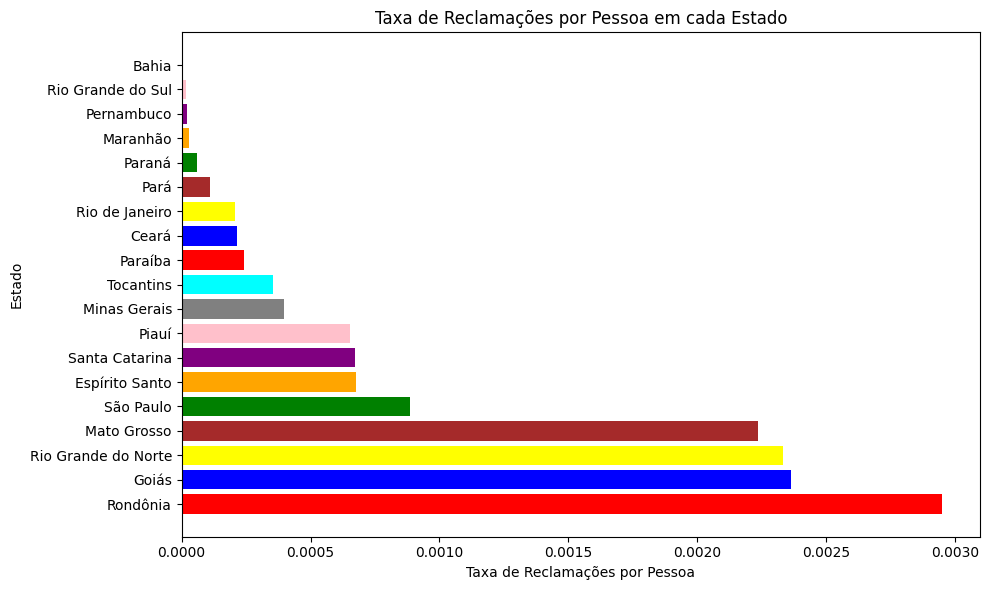

In [ ]:
#Agrupando pela coluna Regiao
df_reclamacoes_agrupadas_por_estado = df.groupby('UF').size().reset_index(name='TotalReclamacoes')

# Realiza o merge dos dois dataframes: Reclamações x Estado !
df_reclamacoes_estado = pd.merge(df_reclamacoes_agrupadas_por_estado, df_estados, left_on='UF', right_on = 'Estado',how='inner')

print(df_reclamacoes_estado)


# Calculan a taxa de reclamações por pessoa !
df_reclamacoes_estado['Taxa_Reclamacoes_por_Pessoa'] = df_reclamacoes_estado['TotalReclamacoes'] / df_reclamacoes_estado['Populacao_Estimada']

# Ordena pela taxa de reclamações !
df_reclamacoes_estado_sort = df_reclamacoes_estado.sort_values(by='Taxa_Reclamacoes_por_Pessoa', ascending=False)

# Cria o gráfico !
cores = ['red','blue', 'yellow','brown','green', 'orange', 'purple', 'pink', 'gray', 'cyan']
plt.figure(figsize=(10, 6))
plt.barh(df_reclamacoes_estado_sort['Nome'], df_reclamacoes_estado_sort['Taxa_Reclamacoes_por_Pessoa'], color=cores)
plt.xlabel('Taxa de Reclamações por Pessoa')
plt.ylabel('Estado')
plt.title('Taxa de Reclamações por Pessoa em cada Estado')
plt.tight_layout()


##**4 -** Quais as empresas que receberam mais reclamações dos consumidores? E por região e estado?

                            strRazaoSocial  TotalDias
5295                             CLARO S/A   369011.0
3939               CAIXA ECONOMICA FEDERAL   267577.0
2554                  BANCO DO BRASIL S/A.   264857.0
21796                      TIM CELULAR S/A   255524.0
19641  SAMSUNG ELETRONICA DA AMAZONIA LTDA   253234.0


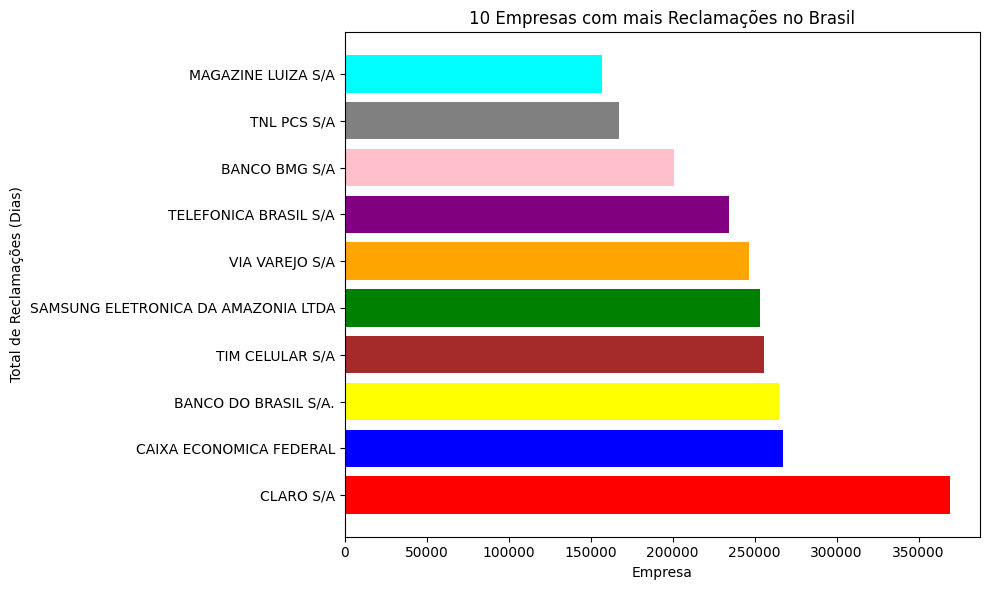



Principais Empresas com mais Reclamações por Regiao





In [ ]:
# Constantes
# Maximo de empresas
MAX_EMP = 10

# Reclamações por empresa
reclamacoes_por_empresa = df.groupby('strRazaoSocial')['TotalDias'].sum().reset_index()
reclamacoes_por_empresa = reclamacoes_por_empresa.sort_values(by='TotalDias', ascending=False).head(MAX_EMP)

# Exibindo as 5 empresas com mais reclamações
print(reclamacoes_por_empresa.head())

# Visualizando as empresas com mais reclamações no Brasil
cores = ['red','blue', 'yellow','brown','green', 'orange', 'purple', 'pink', 'gray', 'cyan']
plt.figure(figsize=(10, 6))
plt.barh(reclamacoes_por_empresa['strRazaoSocial'], reclamacoes_por_empresa['TotalDias'], color=cores)
plt.xlabel('Empresa')
plt.ylabel('Total de Reclamações (Dias)')
plt.title(f'{MAX_EMP} Empresas com mais Reclamações no Brasil')
plt.tight_layout()
plt.show()


print('\n\nPrincipais Empresas com mais Reclamações por Regiao\n\n\n')

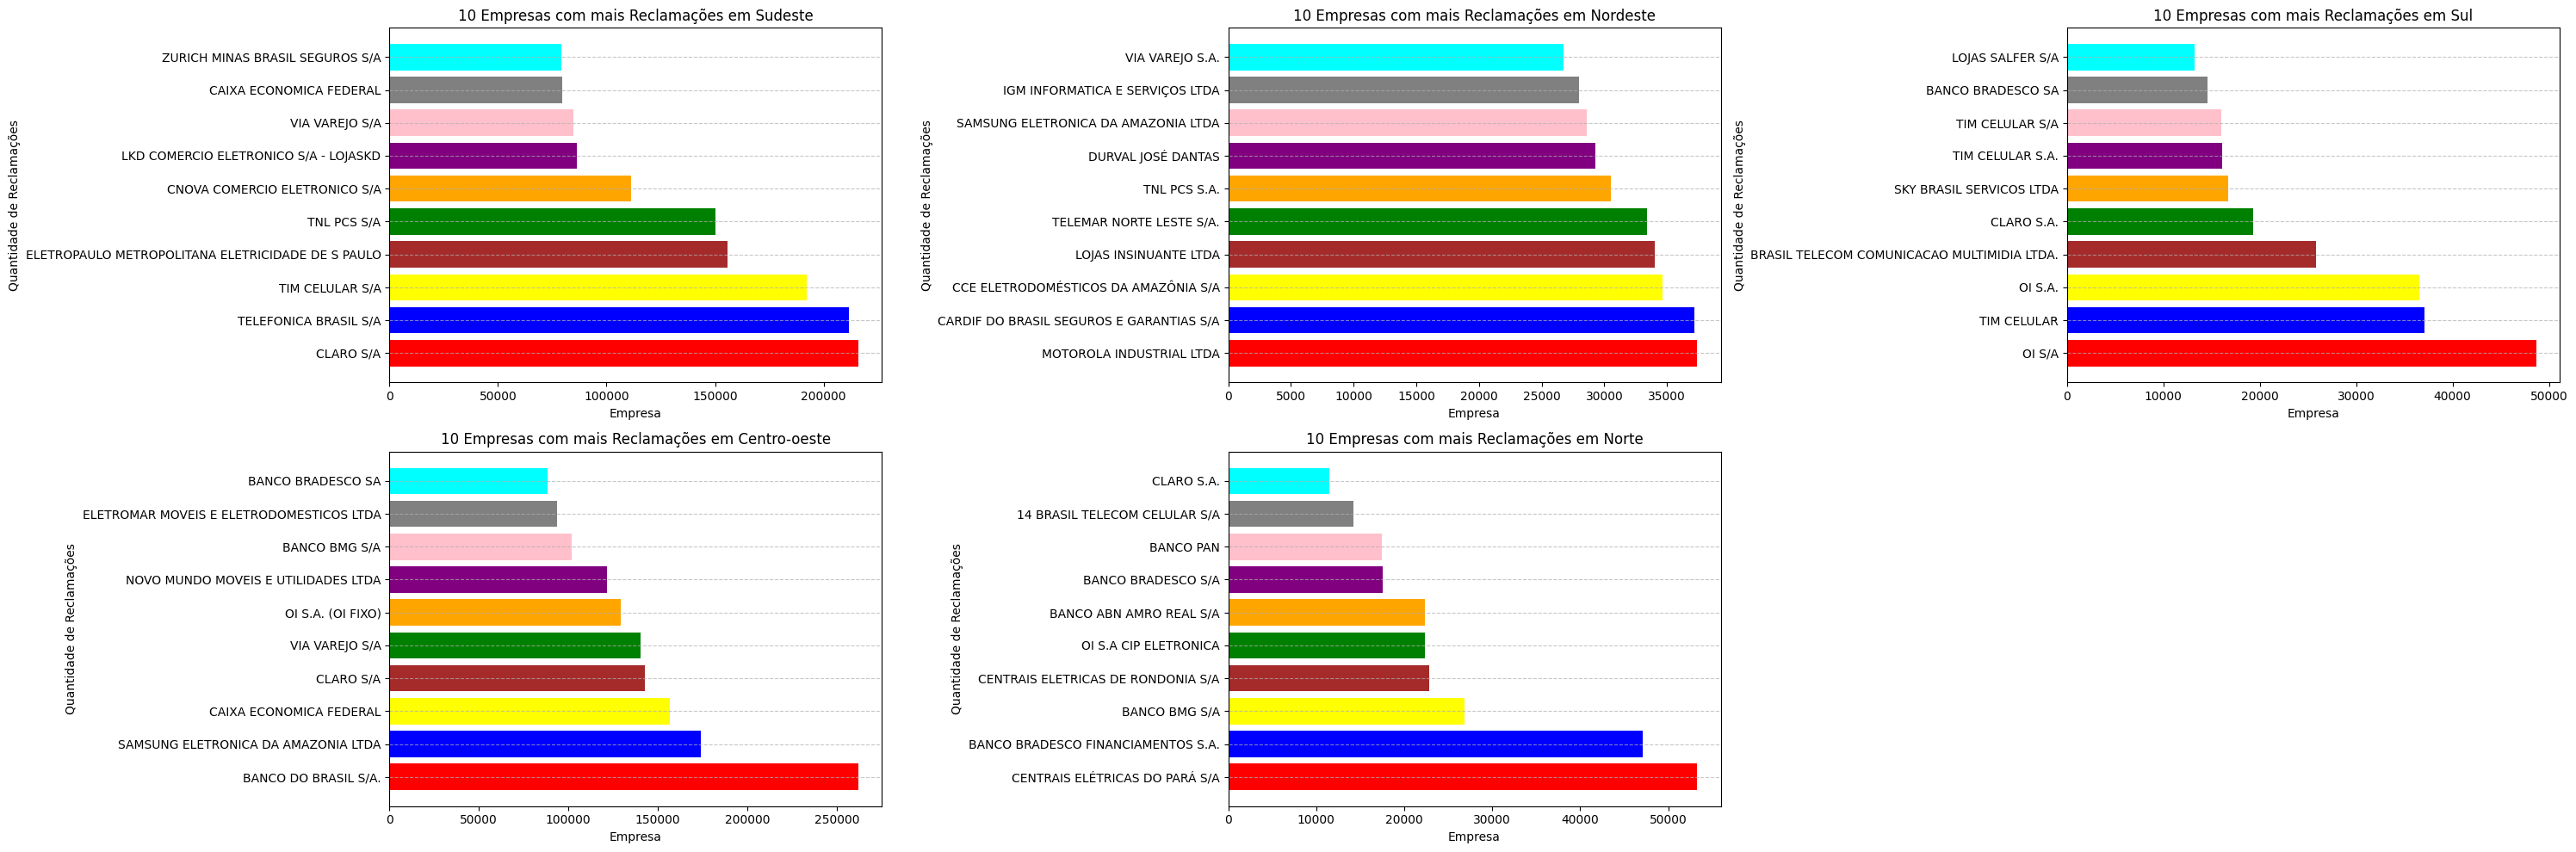



Principais Empresas com mais Reclamações por Estado





In [ ]:
# Criar gráficos separados por Região
plt.figure(figsize=(30, 10))
i = 0
for regiao in df_regioes['Regiao'].unique():
    region_data = df[df['Regiao'] == regiao]
    region_data = region_data.groupby(['strRazaoSocial'])['TotalDias'].sum().reset_index()
    region_data_sorted = region_data.sort_values(by='TotalDias', ascending=False).head(MAX_EMP)
    i = i + 1
    cores = ['red','blue', 'yellow','brown','green', 'orange', 'purple', 'pink', 'gray', 'cyan']
    plt.subplot(2, 3, i)
    plt.barh(region_data_sorted['strRazaoSocial'], region_data_sorted['TotalDias'], color=cores)

    plt.title(f'{MAX_EMP} Empresas com mais Reclamações em {regiao}')
    plt.ylabel('Quantidade de Reclamações')
    plt.xlabel('Empresa')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()  # Ajustar layout para evitar sobreposição
plt.show()


print('\n\nPrincipais Empresas com mais Reclamações por Estado\n\n\n')

In [ ]:
# Criar gráficos por estado
MAX_EMP = 5
estado_data = df.groupby(['UF', 'strRazaoSocial'])['TotalDias'].sum().reset_index()
estado_data_sorted = estado_data.sort_values(by='TotalDias', ascending=False).groupby('UF').head(MAX_EMP)

fig = px.bar(
    estado_data_sorted,
    x='strRazaoSocial',
    y='TotalDias',
    color='UF',
    title='Empresas Mais Reclamadas por Estado',
    labels={'strRazaoSocial': 'Empresa', 'TotalDias': 'Reclamações'},
    facet_col='UF',
    facet_col_wrap=4,  # Limita para 4 facetas por linha
    height=800
)
fig.update_xaxes(tickangle=45, automargin=True)  # Rotação e margem automática
fig.update_traces(marker_line_width=1)
fig.update_layout(
    font=dict(size=10),
    bargap=0.1,
)
fig.update_layout(
    margin=dict(t=80, l=50, r=50, b=80),
    showlegend=False
)
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_xaxes(matches=None)
fig.show()



---


# **2)Modelagem: Prevendo o tempo de uma reclamação ativa**

## **1 -** Quais variáveis podem estar mais correlacionadas com o tempo de uma reclamação ativa?


In [ ]:
# Identificamos as colunas mais relacionadas ao TotalDias, que parece representar o tempo da reclamação ativa. Usaremos a correlação de Pearson para medir a força das relações lineares.

# 1. Identificar variáveis correlacionadas com "TotalDias"
correlation_matrix = df.corr(numeric_only=True)  # Considera apenas colunas numéricas

# Exibindo as correlações com a variável "TotalDias"
print("Correlação com TotalDias:")
print(correlation_matrix['TotalDias'].sort_values(ascending=False))

Correlação com TotalDias:
TotalDias         1.000000
CodigoRegiao      0.212755
AnoCalendario     0.035876
CNAEPrincipal     0.008998
CodigoAssunto    -0.001691
CodigoProblema   -0.039440
Name: TotalDias, dtype: float64


Correlação de Pearson

A correlação de Pearson é uma medida estatística que avalia a força e a direção de uma relação linear entre duas variáveis. O valor da correlação vai de -1 a 1:



*   1: Correlação positiva perfeita (quando uma variável aumenta, a outra também aumenta na mesma proporção).
*   0: Nenhuma correlação (não há relação linear entre as variáveis).
*   -1: Correlação negativa perfeita (quando uma variável aumenta, a outra diminui).





In [ ]:
# Fazer teste ANOVA para verificar as colunas categoricas que são correlacionadas com TotalDias:
from scipy.stats import f_oneway
def perform_anova(df, categorical_col, target_col='TotalDias'):
    grouped_data = [
        df[df[categorical_col] == category][target_col].dropna()
        for category in df[categorical_col].dropna().unique()
    ]
    if len(grouped_data) > 1:
        return f_oneway(*grouped_data)
    return None

# Realizar ANOVA para colunas categóricas e organizar resultados em tabela
anova_results = {}
categorical_cols = ['Regiao', 'UF', 'Atendida', 'SexoConsumidor']
for col in categorical_cols:
    result = perform_anova(df, col)
    if result:
        anova_results[col] = {'F-statistic': result.statistic, 'p-value': result.pvalue}

# Converter resultados da ANOVA em formato tabular
anova_results_df = pd.DataFrame(anova_results).T.reset_index()
anova_results_df.columns = ['Categorical Column', 'F-statistic', 'p-value']

# Exibir resultados da ANOVA
print("\nResultados ANOVA:")
print(anova_results_df)


Resultados ANOVA:
  Categorical Column  F-statistic   p-value
0             Regiao  1882.891984  0.000000
1                 UF  1165.772861  0.000000
2           Atendida     0.145265  0.703102
3     SexoConsumidor  1024.507035  0.000000


## **2 -** Construa variáveis que podem estar correlacionadas com o tempo de uma reclamação ativa a partir dos dados: Exemplo: crie variáveis dummy referentes ao período do ano ; região

In [ ]:
# Criando dummies para período do ano e região
print(df.columns)

colunas_para_dummies = [ 'UF', 'CodigoRegiao','Atendida']

# Verificar se as colunas existem no DataFrame
for coluna in colunas_para_dummies:
    if coluna not in df.columns:
        print(f"Aviso: A coluna '{coluna}' não foi encontrada no DataFrame.")

# Criar dummies apenas para as colunas existentes
colunas_existentes = [col for col in colunas_para_dummies if col in df.columns]

# Dicionário para mapear os prefixos
prefixos = {
    'Atendida': ['Atendida'],
    'UF': ['UF'],
    'CodigoRegiao': ['CodRegiao']
}

# Aplicar get_dummies para cada coluna com o prefixo correspondente
for coluna in colunas_existentes:
    df = pd.get_dummies(df, columns=[coluna], drop_first=True, prefix=prefixos[coluna])



Index(['AnoCalendario', 'MesCalendario', 'TotalDias', 'CodigoRegiao', 'Regiao',
       'UF', 'NumeroCNPJ', 'strRazaoSocial', 'CNAEPrincipal',
       'DescCNAEPrincipal', 'Atendida', 'CodigoAssunto', 'DescricaoAssunto',
       'CodigoProblema', 'DescricaoProblema', 'SexoConsumidor',
       'FaixaEtariaConsumidor', 'MesCalendarioNumerico'],
      dtype='object')


## **3 -** Analise a correlação das variáveis

Heatmap (Mapa de calor):

Um heatmap é uma forma visual de representar dados. Para o nosso caso, ele é usado para visualizar a matriz de correlação entre todas as variáveis do dataset.

O heatmap usa cores para mostrar o grau de correlação:
Cores fortes (mais escuras ou intensas) representam correlações altas (próximas de 1 ou -1).
Cores mais claras indicam correlação fraca (próxima de 0).

No contexto do nosso código: Primeiro, calculamos a correlação de Pearson entre todas as colunas numéricas usando o método data.corr().
Depois, usamos a biblioteca seaborn para criar o heatmap e representar as correlações em uma tabela visual. Isso facilita identificar quais variáveis podem influenciar mais o TotalDias


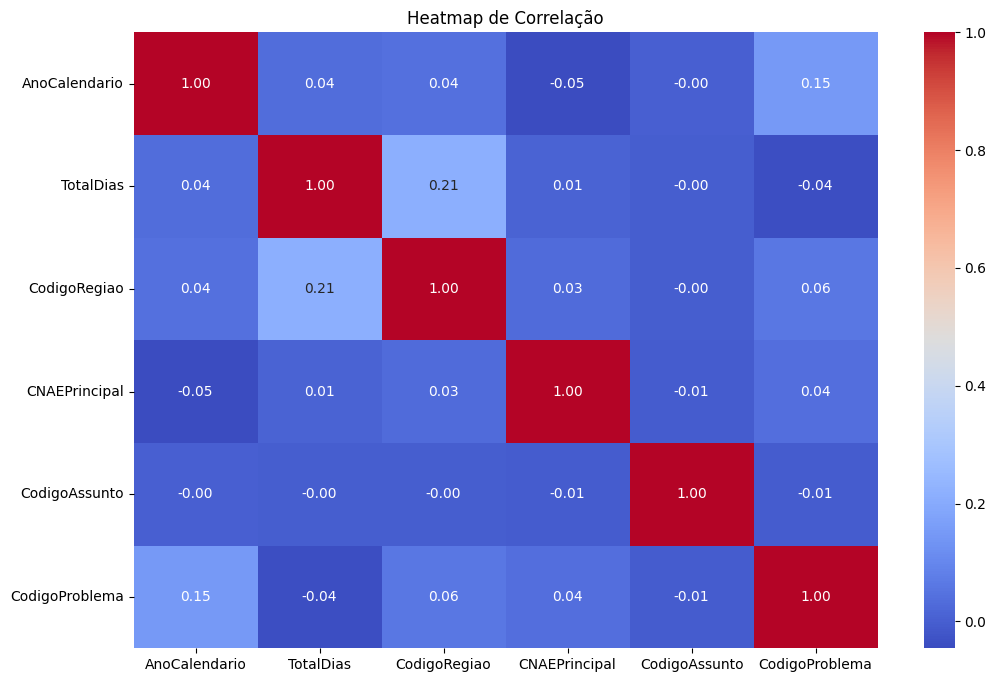

In [ ]:
# Usaremos um heatmap para visualizar a relação entre variáveis e interpretar os coeficientes.


# Visualizar as correlações usando um heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap de Correlação')
plt.show()

## **4 -** Construa um modelo de regressão linear em que queremos estimar o tempo de uma reclamação ativa.  


In [ ]:
# df['MesCalendario'] = df['MesCalendario'].fillna("Não Classificados")

# Substituindo "Não Classificados" por NaN
df['MesCalendario'] = df['MesCalendario'].replace("Não Classificados", np.nan)


<ipython-input-23-7f558386f8d3>:4: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115967 entries, 0 to 115966
Data columns (total 39 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   AnoCalendario          115967 non-null  int64  
 1   MesCalendario          115942 non-null  float64
 2   TotalDias              115942 non-null  float64
 3   Regiao                 115967 non-null  object 
 4   NumeroCNPJ             115967 non-null  object 
 5   strRazaoSocial         115964 non-null  object 
 6   CNAEPrincipal          115967 non-null  int64  
 7   DescCNAEPrincipal      115403 non-null  object 
 8   CodigoAssunto          115967 non-null  int64  
 9   DescricaoAssunto       115966 non-null  object 
 10  CodigoProblema         50511 non-null   float64
 11  DescricaoProblema      50527 non-null   object 
 12  SexoConsumidor         115966 non-null  object 
 13  FaixaEtariaConsumidor  115924 non-null  object 
 14  MesCalendarioNumerico  115967 non-nu

In [ ]:
# Selecionar apenas colunas numéricas e booleanas
df_numerico = df.select_dtypes(include=['number', 'bool'])

# Exibir as primeiras linhas para confirmar
print(df_numerico.head())

# Confirmar as colunas restantes
print(df_numerico.info())


   AnoCalendario  MesCalendario  TotalDias  CNAEPrincipal  CodigoAssunto  \
0           2017           10.0       70.0        6422100             76   
1           2017           12.0      134.0              0            186   
2           2017           12.0      130.0        3514000            185   
3           2017           10.0       99.0        5223100            262   
4           2017           12.0      136.0        6120501            186   

   CodigoProblema  UF_CE  UF_ES  UF_GO  UF_MA  ...  UF_RO  UF_RS  UF_SC  \
0          1112.0  False  False  False  False  ...  False  False  False   
1          3844.0  False  False  False  False  ...  False  False  False   
2          6030.0  False  False  False  False  ...  False  False  False   
3          4946.0  False  False  False  False  ...  False  False  False   
4          3624.0  False  False  False  False  ...  False  False  False   

   UF_SP  UF_TO  CodRegiao_2  CodRegiao_3  CodRegiao_4  CodRegiao_5  \
0   True  False      

In [ ]:
df['MesCalendario'] = df['MesCalendario'].replace("Não Classificados", np.nan)

In [ ]:
# Dropar todas as linhas que contêm qualquer valor vazio
df_numerico = df_numerico.dropna(axis=0, how='any')

# Confirmar que as linhas foram removidas
print(df_numerico.info())


<class 'pandas.core.frame.DataFrame'>
Index: 50506 entries, 0 to 115966
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AnoCalendario   50506 non-null  int64  
 1   MesCalendario   50506 non-null  float64
 2   TotalDias       50506 non-null  float64
 3   CNAEPrincipal   50506 non-null  int64  
 4   CodigoAssunto   50506 non-null  int64  
 5   CodigoProblema  50506 non-null  float64
 6   UF_CE           50506 non-null  bool   
 7   UF_ES           50506 non-null  bool   
 8   UF_GO           50506 non-null  bool   
 9   UF_MA           50506 non-null  bool   
 10  UF_MG           50506 non-null  bool   
 11  UF_MS           50506 non-null  bool   
 12  UF_MT           50506 non-null  bool   
 13  UF_PA           50506 non-null  bool   
 14  UF_PB           50506 non-null  bool   
 15  UF_PE           50506 non-null  bool   
 16  UF_PI           50506 non-null  bool   
 17  UF_PR           50506 non-null  boo

In [ ]:
# Preparando os dados para o modelo
X = df_numerico.drop(columns=['TotalDias'])
y = df_numerico['TotalDias']

In [ ]:
# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Treinando o modelo de Regressão Linear
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Avaliação do modelo
y_pred = modelo.predict(X_test)
print("\nMétricas de avaliação do modelo:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"R^2: {r2_score(y_test, y_pred)}")


Métricas de avaliação do modelo:
RMSE: 328.52988035167687
R^2: 0.1614460880362344


In [ ]:
# Coeficientes do modelo
print("\nCoeficientes do modelo:")
for nome, coef in zip(X.columns, modelo.coef_):
    print(f"{nome}: {coef}")


Coeficientes do modelo:
AnoCalendario: 15.169904180838998
MesCalendario: 0.8324960692080878
CNAEPrincipal: 5.381913221511066e-06
CodigoAssunto: -5.444911089229723e-05
CodigoProblema: -0.002481767538231819
UF_CE: 99.36915312897767
UF_ES: -103.33176448204303
UF_GO: 82.25135646343176
UF_MA: 127.82049639662205
UF_MG: 152.64340779772184
UF_MS: -199.28998012654424
UF_MT: 168.18771117546788
UF_PA: -229.0684931390062
UF_PB: 125.57550789311786
UF_PE: 153.15490744025794
UF_PI: 78.98245574973322
UF_PR: -230.54517483206712
UF_RJ: -48.4375515675183
UF_RN: 94.98215629480357
UF_RO: -197.96172300245027
UF_RS: 386.46536486952624
UF_SC: -72.39647046983649
UF_SP: -58.84329755919535
UF_TO: 541.0054586507057
CodRegiao_2: -190.6788437775373
CodRegiao_3: -57.96920581120277
CodRegiao_4: 83.5237195671731
CodRegiao_5: 51.149087512180074
Atendida_S: -97.63657655160924


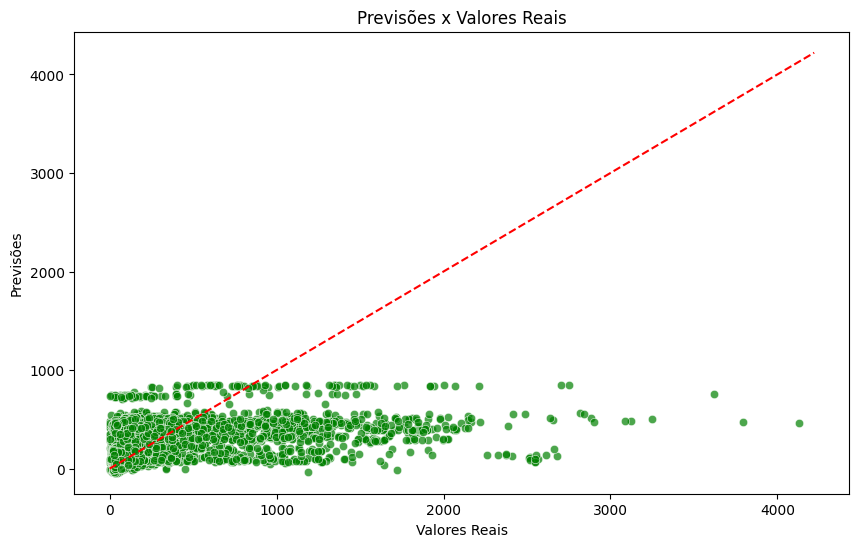

In [ ]:
# Visualizando previsões x valores reais
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.title("Previsões x Valores Reais")
plt.xlabel("Valores Reais")
plt.ylabel("Previsões")
plt.show()

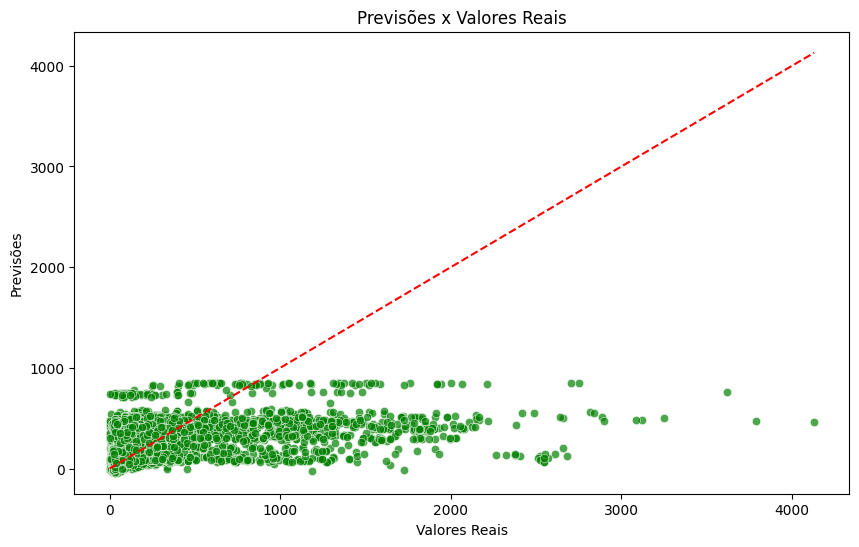

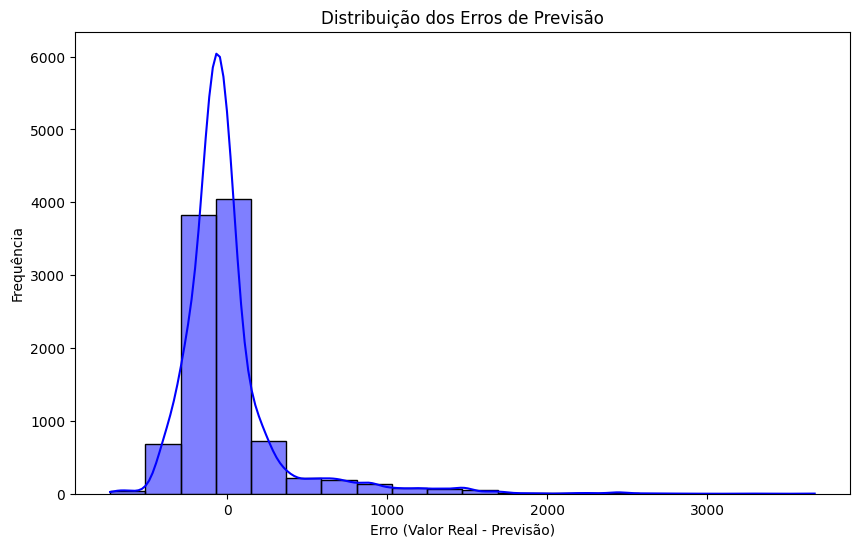

In [ ]:
#Visualizando previsões vs valores reais
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Previsões x Valores Reais")
plt.xlabel("Valores Reais")
plt.ylabel("Previsões")
plt.show()

# Visualizando a distribuição dos erros (diferença entre previsões e reais)
errors = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True, color='blue', bins=20)
plt.title("Distribuição dos Erros de Previsão")
plt.xlabel("Erro (Valor Real - Previsão)")
plt.ylabel("Frequência")
plt.show()

25
Número de outliers em 'TotalDias': 15401
        AnoCalendario  MesCalendario  TotalDias        Regiao   NumeroCNPJ  \
34               2017            2.0      367.0         Norte  1,23503E+13   
67               2017           12.0      391.0       Sudeste  8,34349E+12   
68               2017           12.0      386.0       Sudeste  4,18478E+12   
75               2017           12.0      368.0       Sudeste  4,69169E+12   
149              2017            2.0      525.0      Nordeste            0   
...               ...            ...        ...           ...          ...   
115922           2021            4.0      584.0  Centro-oeste  4,20605E+12   
115933           2021           11.0      362.0       Sudeste  6,13485E+13   
115946           2021            1.0     1364.0  Centro-oeste  1,47272E+12   
115950           2021            8.0     2714.0  Centro-oeste  8,94063E+12   
115953           2021            7.0      683.0  Centro-oeste  1,57607E+13   

                   

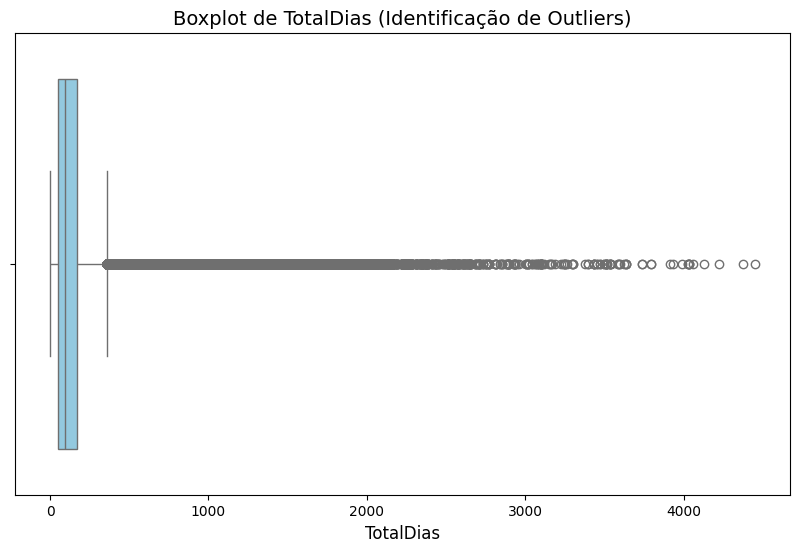

In [ ]:
#Justificando os outliers

# Verificar a presença de valores nulos
print(df['TotalDias'].isnull().sum())

# Cálculo do IQR
Q1 = df['TotalDias'].quantile(0.25)  # Primeiro quartil (25%)
Q3 = df['TotalDias'].quantile(0.75)  # Terceiro quartil (75%)
IQR = Q3 - Q1                        # Intervalo interquartil

# Limites para outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar os outliers
outliers = df[(df['TotalDias'] < lower_bound) | (df['TotalDias'] > upper_bound)]

print(f"Número de outliers em 'TotalDias': {len(outliers)}")
print(outliers)

# Gráfico de Boxplot para visualizar outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['TotalDias'], color='skyblue')
plt.title('Boxplot de TotalDias (Identificação de Outliers)', fontsize=14)
plt.xlabel('TotalDias', fontsize=12)
plt.show()